In [1]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from climada.entity import ImpactFunc, ImpactFuncSet
import sys
sys.path.append('../../src/write_entities/')

from define_if import polynomial
from define_if import impact_functions_random

2020-11-11 10:20:04,442 - climada - DEBUG - Loading default config file: /Users/zeliestalhanske/Documents/GitHub/climada_python/climada/conf/defaults.conf


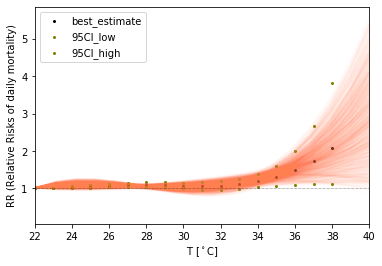

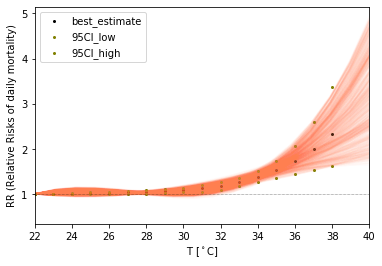

In [9]:
colors=['black','olive','olive']
n = 1000
x = np.linspace(20,40,num=20)

###########################################################################################################

file_under75 = pd.read_csv("../../input_data/impact_functions/impact_under75.csv") 
data_under75 = ['best_estimate','95CI_low', '95CI_high']

fig,ax = plt.subplots()
ax.set_xlim(22, 40)

c=0
for data in data_under75:
    ax.scatter(file_under75['T'], file_under75[data], s=4, label=data, color=colors[c])
    c=c+1
    
for n_ in range(n):
    function_under75 = impact_functions_random(file_under75)
    y = polynomial(x, *function_under75)
    
    ax.plot(x,y,alpha=0.02,color='coral')

plt.axhline(y=1, color='black', linestyle='dotted', linewidth=0.5)

ax.set_xlabel('T [$^\circ$C]')
ax.set_ylabel('RR (Relative Risks of daily mortality)')
#ax.set_title('People under 75 years')
ax.legend()
plt.savefig('../figures/impact_functions_under75.pdf',bbox_inches='tight')   

##########################################################################################################    
    
file_over75 = pd.read_csv("../../input_data/impact_functions/impact_over75.csv") 
data_over75 = ['best_estimate','95CI_low', '95CI_high']   

fig,ax = plt.subplots()   
ax.set_xlim(22, 40)



for n_ in range(n):
    function_over75 = impact_functions_random(file_over75)
    y = polynomial(x, *function_over75)
    
    ax.plot(x,y,alpha=0.02,color='coral') 

c=0  
for data in data_over75:
    ax.scatter(file_over75['T'], file_over75[data], s=4, label=data, color=colors[c])
    c=c+1      
    
plt.axhline(y=1, color='black', linestyle='dotted', linewidth=0.5)
    
ax.set_xlabel('T [$^\circ$C]')
ax.set_ylabel('RR (Relative Risks of daily mortality)')
#ax.set_title('People over 75 years')
ax.legend()
plt.savefig('../figures/impact_functions_over75.pdf',bbox_inches='tight')   

In [3]:
function_over75

array([ 9.27087482e-04, -7.11728710e-02,  1.81110297e+00, -1.42542289e+01])